# Homework 2

This homework focuses on **resampling** and **noise**.

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data Statistics
2. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [8]:
!git clone https://gitlab.com/wgms/glathida.git
!ls glathida/data



fatal: destination path 'glathida' already exists and is not an empty directory.
'ls' is not recognized as an internal or external command,
operable program or batch file.


### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [9]:
# solution
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import xarray as xr

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [10]:
# solution
t_path = "glathida/data/glacier.csv"
df = pd.read_csv(t_path)
df.head()


,id,survey_id,name,external_db,external_id,latitude,longitude,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [11]:
#answer below 
df = df.dropna(subset=['latitude', 'longitude','mean_thickness', 'area', 'mean_slope'])


## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [12]:
import os
url = "https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1"
dem_path = "HYP_50M_SR.tif"
if not os.path.exists(dem_path):
    # Convert Dropbox link to direct download
    url_direct = url.replace("?dl=1", "?raw=1")
    urllib.request.urlretrieve(url_direct, dem_path)


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [13]:
#bounds = (elevation.bounds.left, elevation.bounds.right, \
          #elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [14]:
#red = elevation.read(1)
#green = elevation.read(2)
#blue = elevation.read(3)
#pix = np.dstack((red, green, blue))

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [15]:

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

In [16]:
# solution
# Create log-transformed columns for visualization
df['log_thickness'] = np.log10(df['mean_thickness'] + 1)
df['log_area'] = np.log10(df['area'] + 1)
df['log_slope'] = np.log10(df['mean_slope'] + 1)

# Plot glacier points with color by log thickness
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='log_thickness',
                     size='log_area',
                     hover_name='name',
                     title='Global Glacier Thickness (log-scaled)',
                     projection="natural earth",
                     color_continuous_scale='Viridis')

fig.update_layout(geo=dict(
    showland=True,
    landcolor='rgb(240, 240, 240)',
    showocean=True,
    oceancolor='LightBlue',
    showcoastlines=True
))

fig.show()

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

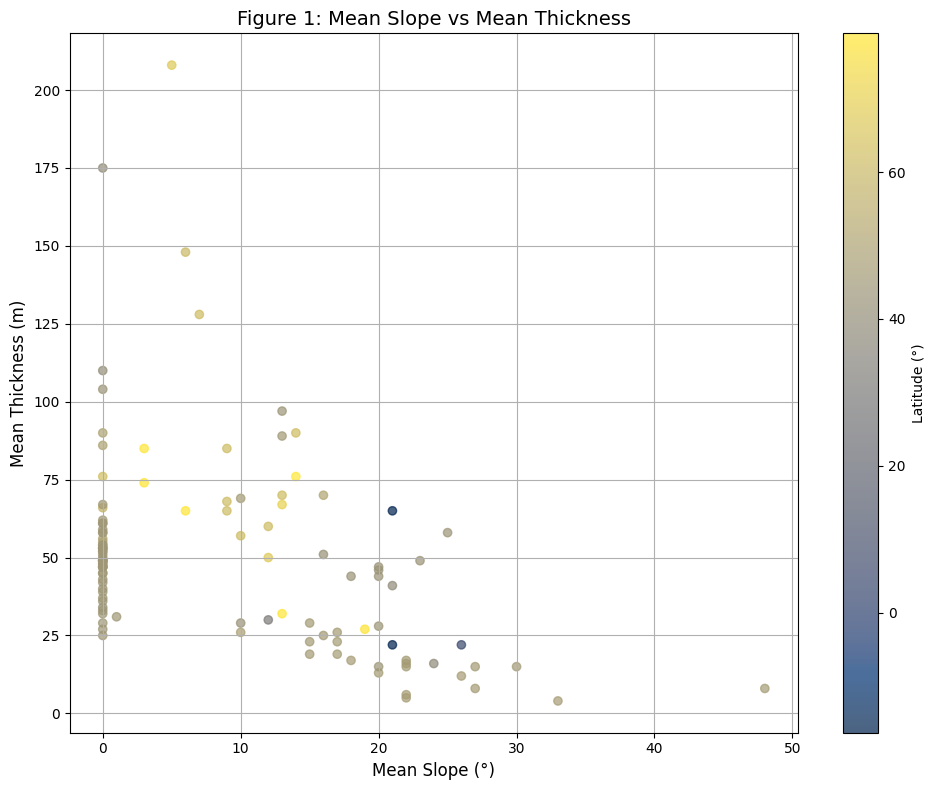

In [17]:
# Figure 1: Mean slope vs mean thickness
df['log_thickness'] = np.log10(df['mean_thickness'] + 1)
df['log_slope'] = np.log10(df['mean_slope'] + 1)

plt.figure(figsize=(10, 8))
sc1 = plt.scatter(df['mean_slope'], df['mean_thickness'], c=df['latitude'], cmap='cividis', alpha=0.7)
plt.xlabel('Mean Slope (°)', fontsize=12)
plt.ylabel('Mean Thickness (m)', fontsize=12)
plt.title('Figure 1: Mean Slope vs Mean Thickness', fontsize=14)
plt.colorbar(sc1, label='Latitude (°)')
plt.grid(True)
plt.tight_layout()
plt.show()

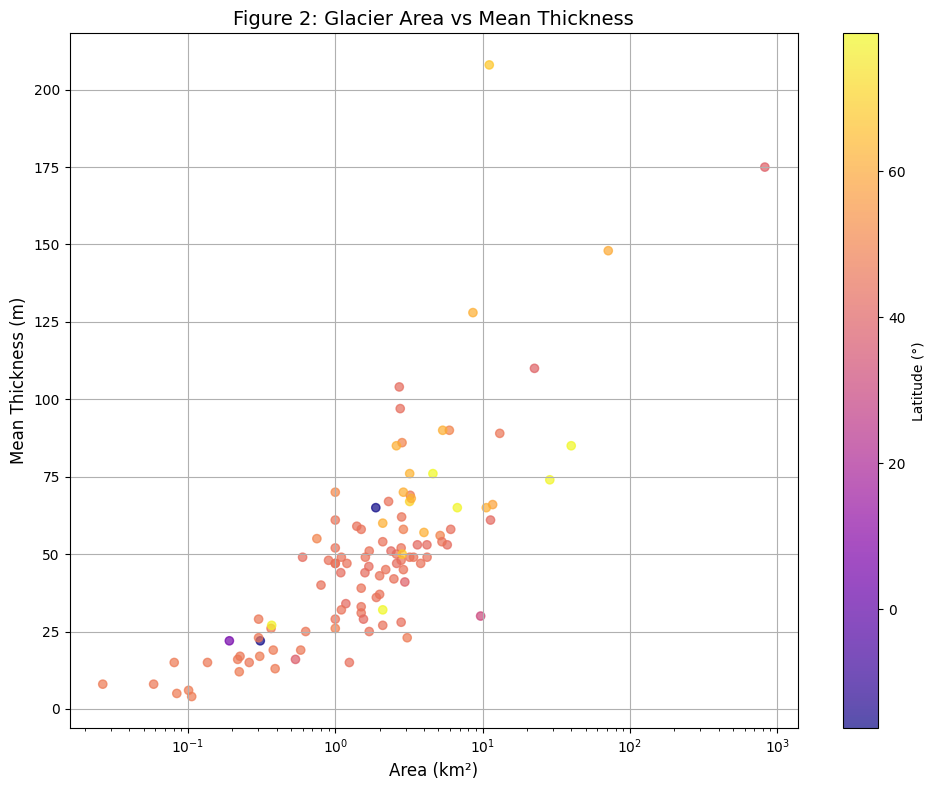

In [18]:
# Figure 2: area vs mean thickness
df['log_area'] = np.log10(df['area'] + 1)

plt.figure(figsize=(10, 8))
sc2 = plt.scatter(df['area'], df['mean_thickness'], c=df['latitude'], cmap='plasma', alpha=0.7)
plt.xlabel('Area (km²)', fontsize=12)
plt.ylabel('Mean Thickness (m)', fontsize=12)
plt.title('Figure 2: Glacier Area vs Mean Thickness', fontsize=14)
plt.xscale('log')
plt.colorbar(sc2, label='Latitude (°)')
plt.grid(True)
plt.tight_layout()
plt.show()

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

In [19]:
fig = px.scatter_3d(df,
                    x='log_area',
                    y='log_thickness',
                    z='log_slope',
                    color='latitude',
                    color_continuous_scale='thermal',
                    title='Glacial Area vs Thickness vs Slope')

fig.update_traces(marker=dict(size=3))
fig.update_layout(
    scene=dict(
        xaxis_title='Area (km²)',
        yaxis_title='Thickness (m)',
        zaxis_title='Slope (°)',
        xaxis_type='log',
        yaxis_type='log',
        zaxis_type='log'
    )
)
fig.show()

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

C:\Users\nmaik\AppData\Local\Temp\ipykernel_34176\74914232.py:10: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



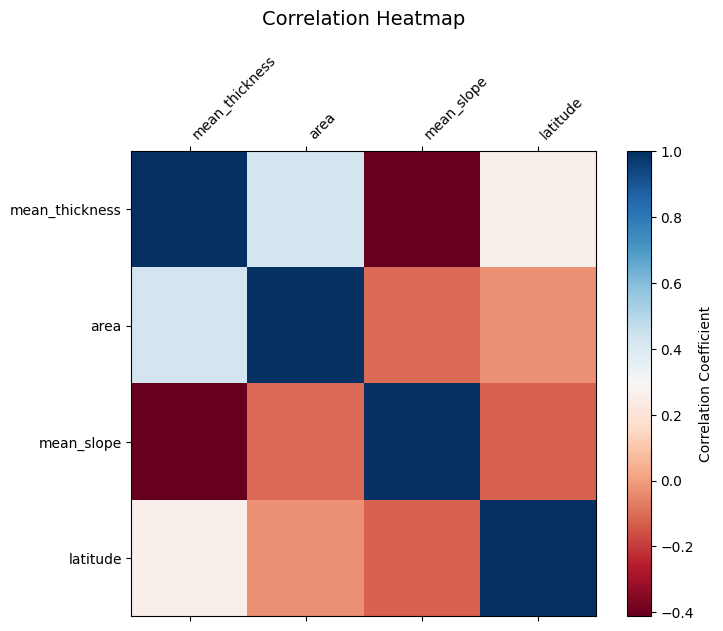

In [20]:
#solution
corr_matrix = df[['mean_thickness', 'area', 'mean_slope', 'latitude']].corr()

plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, cmap='RdBu', fignum=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='left')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Correlation Heatmap", pad=20, fontsize=14)
plt.tight_layout()
plt.show()



### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

In [21]:
#solution

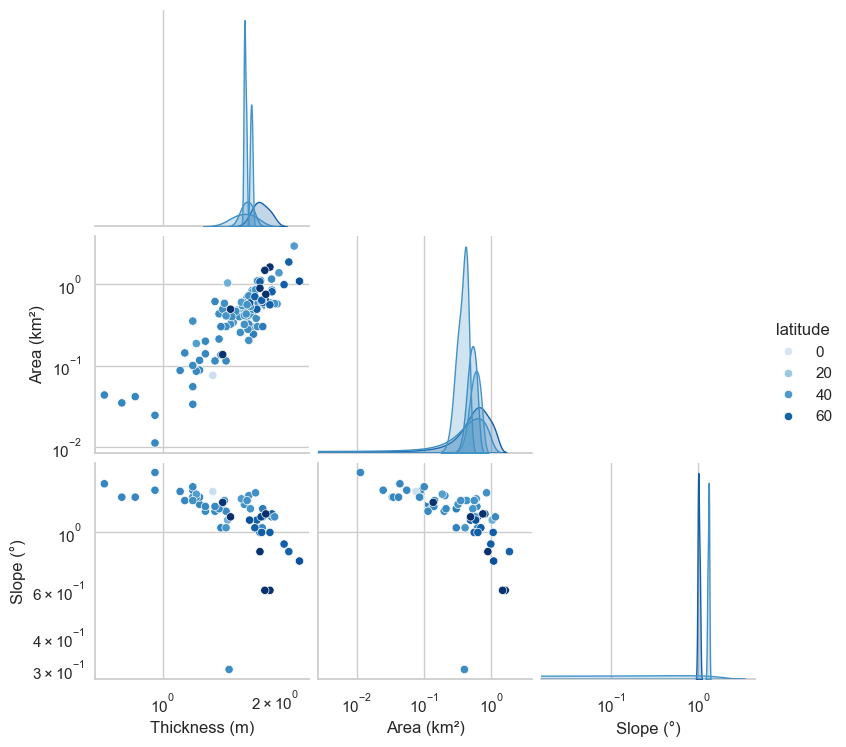

In [22]:
# solution
import seaborn as sns
sns.set(style="whitegrid")
# rename labels in plair plot to remove "log_" from the labels
df_ = df[['log_thickness', 'log_area', 'log_slope', 'latitude']].copy()
df_.rename(columns={'log_thickness': 'Thickness (m)', 'log_area': 'Area (km²)', 'log_slope': 'Slope (°)'}, inplace=True)
pairplot = sns.pairplot(df_,
                        hue="latitude",
                        palette="Blues",
                        corner=True,
                        )



# Set axis labels
for ax in pairplot.axes.flat:
    if ax is not None:
        ax.set_xscale("log")
        ax.set_yscale("log")





plt.show()

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

enter text below



## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [23]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#perform linear regression on the log-transformed data
X = df[['log_area', 'log_slope']].values
y = df['log_thickness'].values
model = LinearRegression() 
# find a and b in y = Ax + b
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.036984764978212833
R² Score: 0.5618807650308868


Make a plot of the data and the linear regression your performed

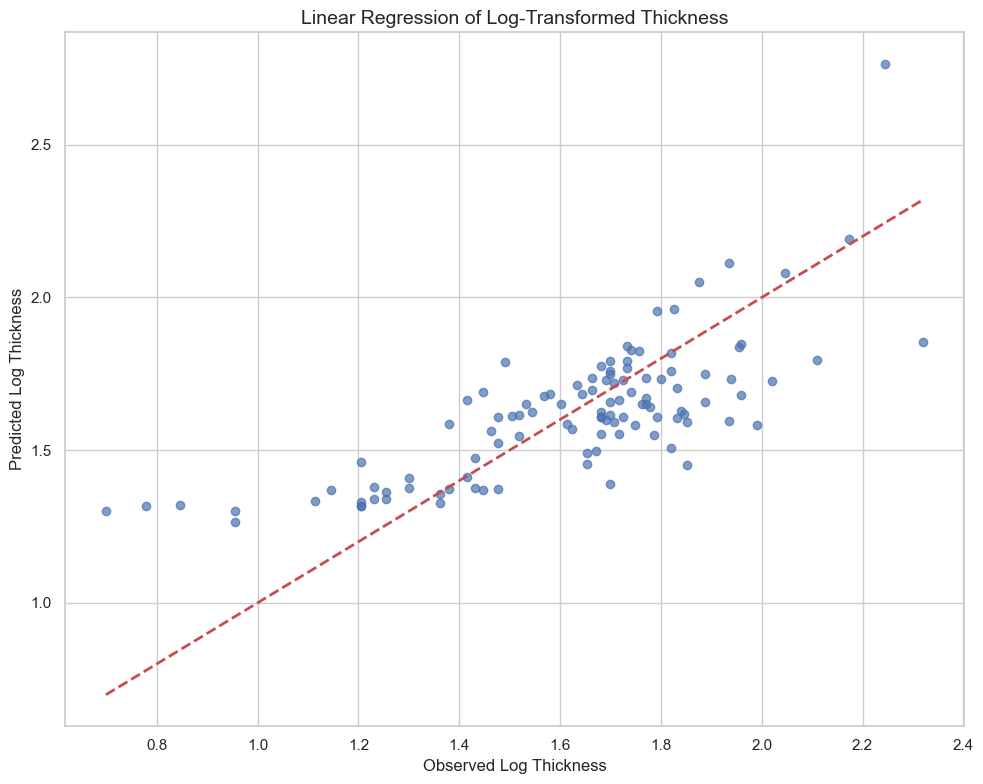

In [24]:
# plot the data and the linear regression we performed
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed Log Thickness', fontsize=12)
plt.ylabel('Predicted Log Thickness', fontsize=12)
plt.title('Linear Regression of Log-Transformed Thickness', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()



**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit looks pretty good, except that there are outliers on the extreme low and high values of mean area.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [25]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()

# perform leave-one-out cross-validation on area and thickness
X = df[['log_area', 'log_slope']].values
y = df['log_thickness'].values
predictions = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions.append(model.predict(X_test)[0])
# Calculate mean squared error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error (Leave-One-Out): {mse}")


Mean Squared Error (Leave-One-Out): 0.041645513275501235


### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

In [32]:
from sklearn.utils import resample
# solution

k=100

# Perform bootstrap resampling
bootstrapped_mse = []
for i in range(k):
    # Generate bootstrap sample, create x_train and y_train, create x_test and y_test
    # resample the data with replacement
    X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(X), random_state=i) 

    # Create test set by removing the resampled data from the original data
    # dont use isin because X is a numpy array
    X_test = X[~np.isin(X, X_resampled)]
    y_test = y[~np.isin(y, y_resampled)]
    print(X.shape)
    print(y.shape)
    print("X_resampled shape:", X_resampled.shape)
    print("y_resampled shape:", y_resampled.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
    break
    
    # Fit model to bootstrap sample
    model = LinearRegression()
    model.fit(X_resampled, y_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # Append to list of bootstrapped MSE
    bootstrapped_mse.append(mse)
# Calculate mean and standard deviation of MSE
mean_mse = np.mean(bootstrapped_mse)
std_mse = np.std(bootstrapped_mse)
print(f"Mean MSE (Bootstrap): {mean_mse}")
print(f"Standard Deviation of MSE (Bootstrap): {std_mse}")


(110, 2)
(110,)
X_resampled shape: (110, 2)
y_resampled shape: (110,)
X_test shape: (43,)
y_test shape: (24,)
Mean MSE (Bootstrap): nan
Standard Deviation of MSE (Bootstrap): nan


### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [27]:
# answer the above question
# solution
import statsmodels.api as sm
import statsmodels.formula.api as smf
# solution
# Fit a linear regression model using statsmodels
model = smf.ols('log_thickness ~ log_area + log_slope', data=df).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          log_thickness   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     68.61
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           6.69e-20
Time:                        00:21:46   Log-Likelihood:                 25.265
No. Observations:                 110   AIC:                            -44.53
Df Residuals:                     107   BIC:                            -36.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4738      0.041     36.277      0.0